In [1]:
import os, shutil, random, glob
import cv2
import numpy as np
import pandas as pd

# os.environ["CUDA_VISIBLE_DEVICES"] = "2"
# CUDA_VISIBLE_DEVICES = 2

import keras
from keras.datasets import cifar10
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [12]:
resize = 224
def load_data():
    imgs = os.listdir("./train/")
    num = len(imgs)
    train_data = np.empty((5000, resize, resize, 3), dtype="int32")
    train_label = np.empty((5000, ), dtype="int32")
    test_data = np.empty((5000, resize, resize, 3), dtype="int32")
    test_label = np.empty((5000, ), dtype="int32")
    for i in range(5000):
        if i % 2:
            train_data[i] = cv2.resize(cv2.imread('./train/' + 'dog.' + str(i) + '.jpg'), (resize, resize))
            train_label[i] = 1
        else:
            train_data[i] = cv2.resize(cv2.imread('./train/' + 'cat.' + str(i) + '.jpg'), (resize, resize))
            train_label[i] = 0
    for i in range(5000, 10000):
        if i % 2:
            test_data[i-5000] = cv2.resize(cv2.imread('./train/' + 'dog.' + str(i) + '.jpg'), (resize, resize))
            test_label[i-5000] = 1
        else:
            test_data[i-5000] = cv2.resize(cv2.imread('./train/' + 'cat.' + str(i) + '.jpg'), (resize, resize))
            test_label[i-5000] = 0
    return train_data, train_label, test_data, test_label

In [13]:
train_data, train_label, test_data, test_label = load_data()
train_data, test_data = train_data.astype('float32'), test_data.astype('float32')
train_data, test_data = train_data/255, test_data/255

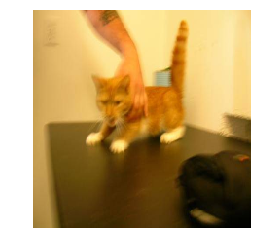

In [14]:
img = train_data[0]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [15]:
train_label = keras.utils.to_categorical(train_label, 2)
test_label = keras.utils.to_categorical(test_label, 2)

In [20]:
#LeNet-5
# model = Sequential()
# model.add(Conv2D(filters=6, kernel_size=(5,5), 
#                  padding='valid', 
#                  input_shape=(224, 224, 3), 
#                  activation='tanh'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(filters=16, kernel_size=(5,5), 
#                  padding='valid', 
#                  activation='tanh')) #双曲正切函数作激活函数 tanhx = (e^x-e^-x)/(e^x+e^-x)
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(120, activation='tanh'))
# model.add(Dense(84, activation='tanh'))
# model.add(Dense(2, activation='softmax')) #softmax函数做激活函数 e^x/(sum(e^x))

# sgd = SGD(lr=0.01, decay=0, momentum=0, nesterov=True) #采用随机梯度下降法作为优化算法
# model.compile(loss='binary_crossentropy',
#               optimizer=sgd, 
#               metrics=['accuracy'])

# AlexNet
model = Sequential()
#第一段
model.add(Conv2D(filters=96, kernel_size=(11,11),
                 strides=(4,4), padding='valid',
                 input_shape=(resize,resize,3),
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), 
                       strides=(2,2), 
                       padding='valid'))
#第二段
model.add(Conv2D(filters=256, kernel_size=(5,5), 
                 strides=(1,1), padding='same', 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), 
                       strides=(2,2), 
                       padding='valid'))
#第三段
model.add(Conv2D(filters=384, kernel_size=(3,3), 
                 strides=(1,1), padding='same', 
                 activation='relu'))
model.add(Conv2D(filters=384, kernel_size=(3,3), 
                 strides=(1,1), padding='same', 
                 activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), 
                 strides=(1,1), padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), 
                       strides=(2,2), padding='valid'))
#第四段
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# model.summary()  

In [21]:
model.fit(train_data, train_label,
          batch_size = 64,
          epochs = 50,
          validation_split = 0.2,
          shuffle = True)

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 6s 1ms/step - loss: 0.7930 - acc: 0.5097 - val_loss: 0.6830 - val_acc: 0.5640
Epoch 2/50
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6987 - acc: 0.5385 - val_loss: 0.6749 - val_acc: 0.5920
Epoch 3/50
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6870 - acc: 0.5528 - val_loss: 0.6725 - val_acc: 0.5900
Epoch 4/50
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6745 - acc: 0.5940 - val_loss: 0.7279 - val_acc: 0.4990
Epoch 5/50
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6672 - acc: 0.5940 - val_loss: 0.8069 - val_acc: 0.4990
Epoch 6/50
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6475 - acc: 0.6278 - val_loss: 0.6998 - val_acc: 0.5410
Epoch 7/50
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6424 - acc: 0.6338 - val_loss: 0.6179 - val_acc: 0.6740
Epoch 8/50
400

In [22]:
scores = model.evaluate(train_data, train_label, verbose=1)
print(scores)

5000/5000 [==============================] - 3s 686us/step
[0.20330142648881303, 0.9666]


In [23]:
scores = model.evaluate(test_data, test_label, verbose=1)
print(scores)

5000/5000 [==============================] - 3s 686us/step
[1.0541164167642594, 0.8208]
